# HW8_Q1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

# RANSAC

In [ ]:
import random
from math import sqrt

In [ ]:
class RANSAC:

  def __init__(self, data, k, n, delta, threshold):
    self.data = data  # all points coordinates on image # [x,y]
    self.k = k  # iterations allowed to run algorithm #
    self.n = n  # number of sample points to estimate model parameters #
    self.delta = delta  # allowed distance between candidate model and inliers #
    self.threshold = threshold # this ratio is terminating algorithm #
    self.bestModel = None
    self.maxInliers = [] #we have to save best model by inliers#

  def random_sampling(self):
    ## Start Your Code ##
    for itr in range(self.k):

      points = random.sample(self.data, self.n)

      h, k, r = self.calculateModel(points)
      
      InliersPoints = []

      for point in self.data:
        d = self.evaluate_model([h, k, r], point)
        if d < self.delta:
          InliersPoints.append(point)
      
      if len(InliersPoints) > len(self.maxInliers):
        self.maxInliers = InliersPoints
        self.bestModel = [h, k, r]
      
      if len(self.maxInliers) / len(self.data) > self.threshold:
        break
    ## End ##
    return self.bestModel , self.maxInliers # after this function we have to draw model #


  def calculateModel(self , sample_points):
    ### you can refer to 
    # "https://www.geeksforgeeks.org/equation-of-circle-when-three-points-on-the-circle-are-given/"
    # to understand how this function works ###

    
    # check our model #
    if len(sample_points) != 3:
      print("Define appropriate model calculation, Model not found!")
      return False

    #extract coordinates#
    x1 = sample_points[0][0]  
    y1 = sample_points[0][1]

    x2 = sample_points[1][0]
    y2 = sample_points[1][1]

    x3 = sample_points[2][0]
    y3 = sample_points[2][1]

    x12 = x1 - x2
    x13 = x1 - x3

    y12 = y1 - y2
    y13 = y1 - y3

    y31 = y3 - y1
    y21 = y2 - y1

    x31 = x3 - x1
    x21 = x2 - x1

    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2)

    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2)

    sx21 = pow(x2, 2) - pow(x1, 2)
    sy21 = pow(y2, 2) - pow(y1, 2)

    f = (((sx13) * (x12) + (sy13) *
          (x12) + (sx21) * (x13) +
          (sy21) * (x13)) // (2 *
                              ((y31) * (x12) - (y21) * (x13))))

    g = (((sx13) * (y12) + (sy13) * (y12) +
          (sx21) * (y13) + (sy21) * (y13)) //
          (2 * ((x31) * (y12) - (x21) * (y13))))

    c = (-pow(x1, 2) - pow(y1, 2) -
          2 * g * x1 - 2 * f * y1)

    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    h = -g
    k = -f
    sqr_of_r = h * h + k * k - c

    # r is the radius
    r = round(sqrt(sqr_of_r), 5)
 
    # print("Centre = (", h, ", ", k, ")")
    # print("Radius = ", r)
    return (h , k , r)
    

  def evaluate_model(self, model, point):
    ## Start your code ##
    d = sqrt(((model[0] - point[0]) ** 2) + ((model[1] - point[1]) ** 2))
    d = np.abs(d-model[2])
    ## End ##
    return d # the distance of point to center of candidate model compared to radius of model

In [ ]:
def drawModel(model):
  c_x = int(model[0])
  c_y = int(model[1])
  r = int(model[2])
  draw_image = cv2.circle(pointsImage, (c_y , c_x), r, (255,0,0), thickness=1, shift=0) #BGR color mode #change x , y order ! OOppps

  fig = plt.figure(figsize = (20,10))
  cols = 2
  rows = 1
  fig.add_subplot(rows , cols , 1)
  plt.imshow(draw_image)
  plt.axis('off')
  plt.title("Ransac output image")
  plt.show()

206
(420, 732)


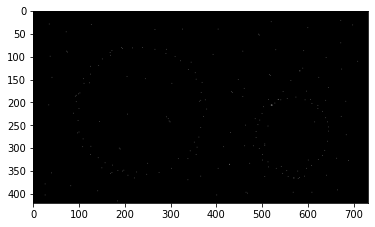

In [ ]:
# process image #
pointsImage = cv2.imread('points.jpg')
pointsImage_gray = cv2.cvtColor(pointsImage ,cv2.COLOR_BGR2GRAY)

ret,thresholded_image = cv2.threshold(pointsImage_gray,10,255,cv2.THRESH_BINARY)

cv2.imwrite('points.jpg' , thresholded_image)

height , width = thresholded_image.shape
data_points = []
# data_points = np.where(thresholded_image == 255)
for i in range(height):
  for j in range(width):
    if thresholded_image[i][j] == 255:
      data_points.append([i,j]) # I save row and column of pixel here as points to be optimized algorithm #
    else:
      continue

print(len(data_points))
print(thresholded_image.shape)
plt.imshow(thresholded_image , cmap='gray')

The final model is centered at [233, 217] , radius is 135.08516 with 33 inliers


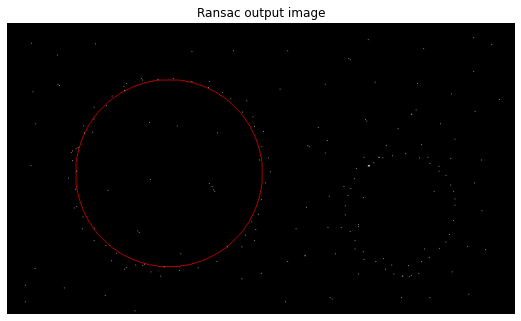

The final model is centered at [567, 272] , radius is 80.21222 with 37 inliers


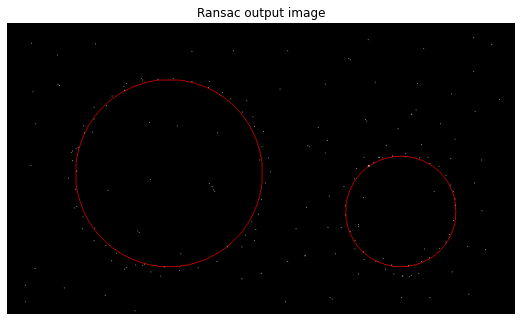

In [ ]:
# set K and just run this cell #
# you can change or add to this cell if needed #
if __name__ == "__main__":
  # make your ransac object here#
  ransac = RANSAC(data_points , k = 100 , n = 3 , delta = 5 , threshold = 0.5)
  # find first model#
  final_model , inliers = ransac.random_sampling()
  center = [final_model[1],final_model[0]] #change order of x , y here
  print("The final model is centered at {} , radius is {} with {} inliers".format(center, final_model[2], len(inliers)))
  drawModel(final_model)

  # make your ransac object here#
  new_data_points = [point for point in data_points if point not in inliers]
  ransac = RANSAC(new_data_points , k = 100 , n = 3 , delta = 5 , threshold = 0.5)
  # find first model#
  final_model , inliers = ransac.random_sampling()
  center = [final_model[1],final_model[0]] #change order of x , y here
  print("The final model is centered at {} , radius is {} with {} inliers".format(center, final_model[2], len(inliers)))
  drawModel(final_model)


# HOUGH

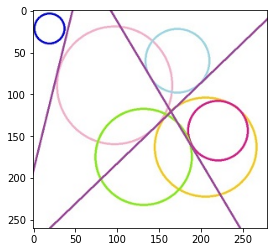

In [ ]:
shapeImage = cv2.imread("ContourCircles.jpg")  
shapeImage = cv2.cvtColor(shapeImage ,cv2.COLOR_BGR2RGB)
plt.imshow(shapeImage)
plt.show()

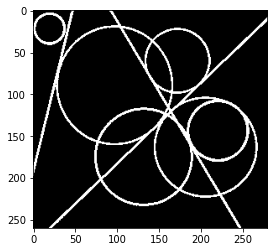

In [ ]:
grayImage = cv2.cvtColor(shapeImage ,cv2.COLOR_RGB2GRAY)
ret,thresholded_image = cv2.threshold(grayImage,230,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresholded_image , cmap="gray")
plt.show()

In [ ]:
h , w , ch= shapeImage.shape
print("height and width are :" , h , w)
edgePointsX , edgePointsY = np.where(thresholded_image == 255)
# print(len(edgePointsX) , edgePointsX , edgePointsY)

height and width are : 260 280


In [ ]:
def CircleHough(x, y, radiusList):

  ## Start Your Code ##
  circleParams = []

  num_circles = len(radiusList)

  circles_info = np.zeros((num_circles, int(h), int(w)))

  for p in zip(x, y):
    x_candidate, y_candidate = p[0], p[1]

    for radius in range(len(radiusList)):

      for theta in range(360):

        radian = theta * np.pi / 180
        x_hough = int(x_candidate - radiusList[radius] * np.cos(radian))
        y_hough = int(y_candidate - radiusList[radius] * np.sin(radian))

        if 0 <= x_hough < h and 0 <= y_hough < w:
          circles_info[radius, x_hough, y_hough] += 1

  for i in range(len(radiusList)):
    circleParams.append(np.append(np.unravel_index([np.argmax(circles_info[i, :, :])], circles_info[i].shape), i))

  circleParams = np.array(circleParams).T
  ## End ##
  
  return circleParams

In [ ]:
def drawCircle(parameters):
  circles = []
  for i,j,k in zip(parameters[0],parameters[1],parameters[2]):
        circles.append((i,j,radiusList[k]))

  for m in circles:
      cv2.circle(shapeImage,(m[1],m[0]), m[2], (255,0,128), 1)

In [ ]:
def showHoughResult(image):
  cv2.imwrite("HoughCirclesTry.jpg" , image)
  fig = plt.figure(figsize = (15,15))
  cols = 2
  rows = 1
  fig.add_subplot(rows , cols , 1)
  plt.imshow(image)
  plt.axis('off')
  plt.title("Hough output image")
  plt.show()

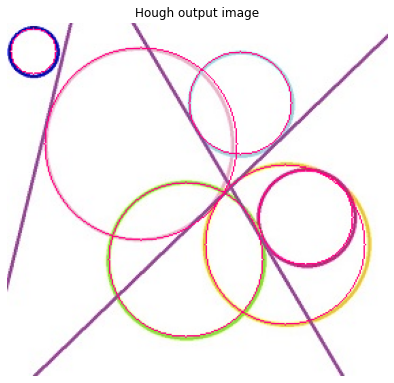

In [ ]:
radiusList = [57 , 71 , 38 , 17 , 35 , 59] # we use fixed radiuses #
circleParams = CircleHough(edgePointsX , edgePointsY , radiusList)
drawCircle(circleParams)
showHoughResult(shapeImage)

## **Hough Line Detection**

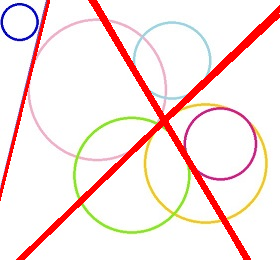

In [69]:
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('ContourCircles.jpg')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	# Stores the value of cos(theta) in a
	a = np.cos(theta)

	# Stores the value of sin(theta) in b
	b = np.sin(theta)

	# x0 stores the value rcos(theta)
	x0 = a*r

	# y0 stores the value rsin(theta)
	y0 = b*r

	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))

	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))

	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))

	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	# drawn. In this case, it is red.
	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
# cv2.imwrite('linesDetected.jpg', img)

from google.colab.patches import cv2_imshow
cv2_imshow(img)